## code to generate panels in Figure 3

Load libraries and dataset from pi_tailtrack experiment

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import os, glob, sys
from scipy.signal import savgol_filter



# get and set directories
dir_path = sys.path[0]
data_dir = os.path.join(dir_path, '20221213')

out_dir = os.path.join(data_dir, 'fig_data')
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

os.chdir(data_dir)

# load datasets
data = np.loadtxt(glob.glob('*coords.txt')[0], delimiter=',')
t_stamps = np.loadtxt(glob.glob('*tstamps.txt')[0], delimiter=',')

Plot two events, the first is a struggle event, the second is a set of 3 swimming events

C:\Users\owen.randlett\AppData\Local\Temp\ipykernel_27328\2559938232.py:15: RuntimeWarning: Mean of empty slice
  orients = np.nanmean(angles, axis=1)
C:\Users\owen.randlett\AppData\Local\Temp\ipykernel_27328\2559938232.py:18: RuntimeWarning: Mean of empty slice
  bend_amps = np.nanmean(diff_angles, axis=1)


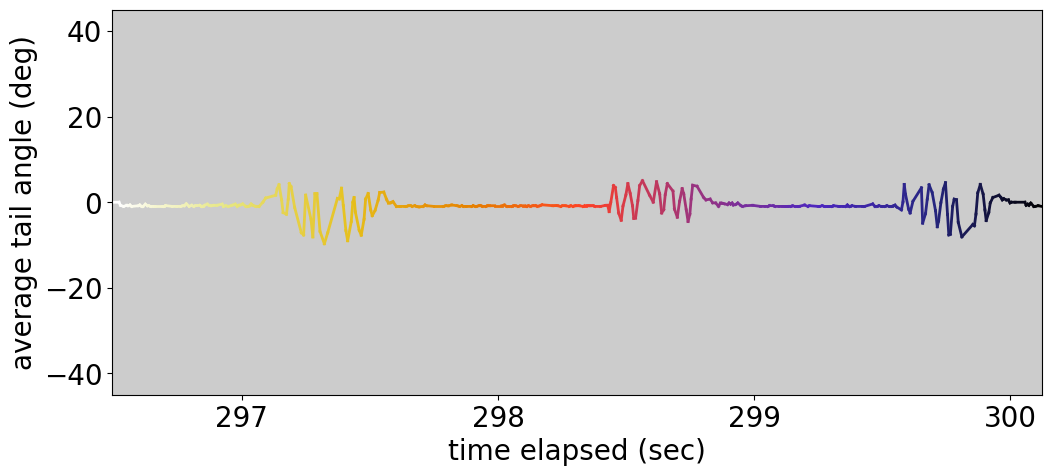

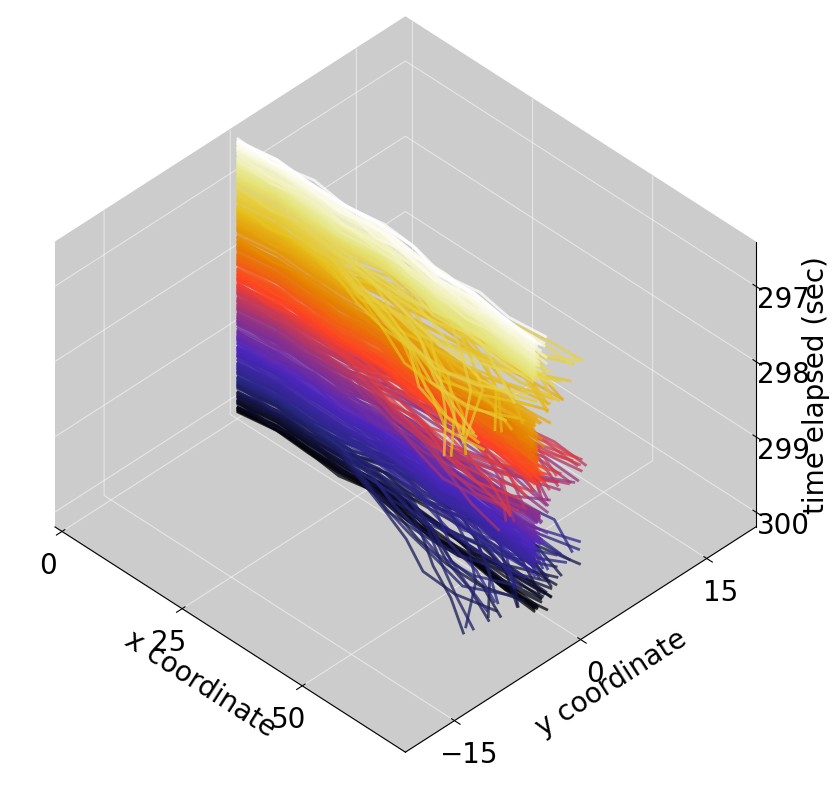

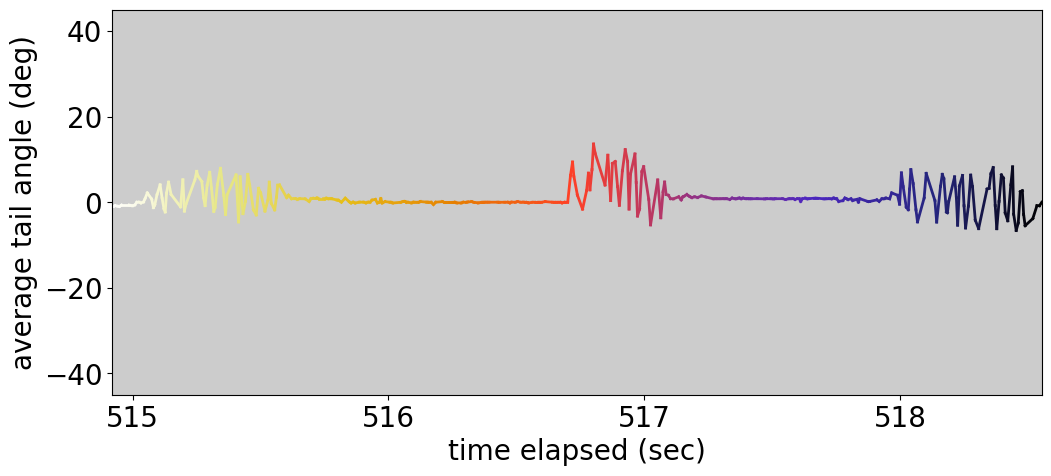

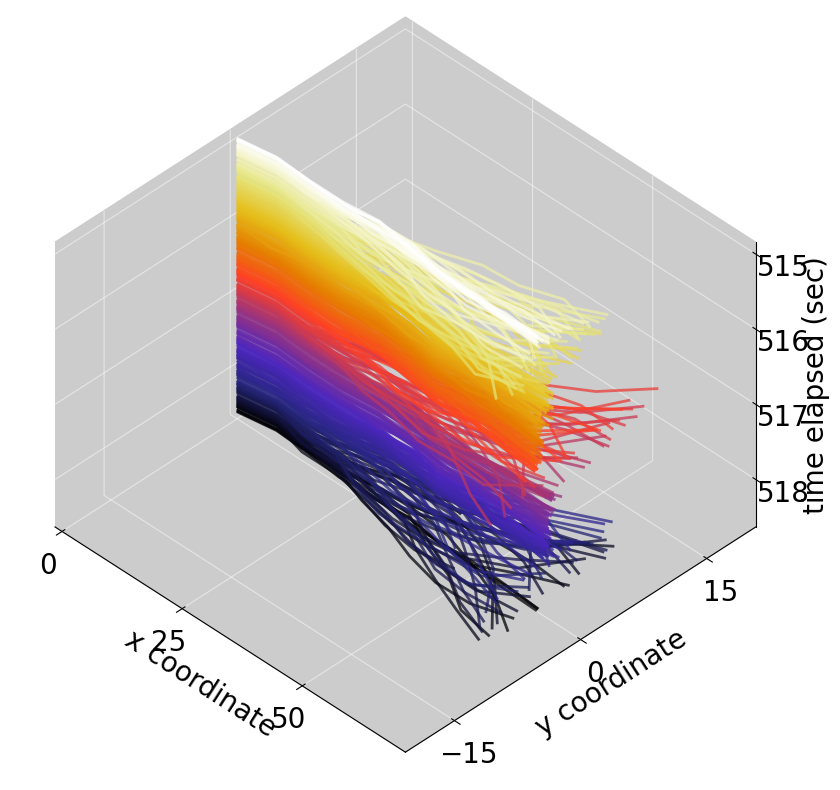

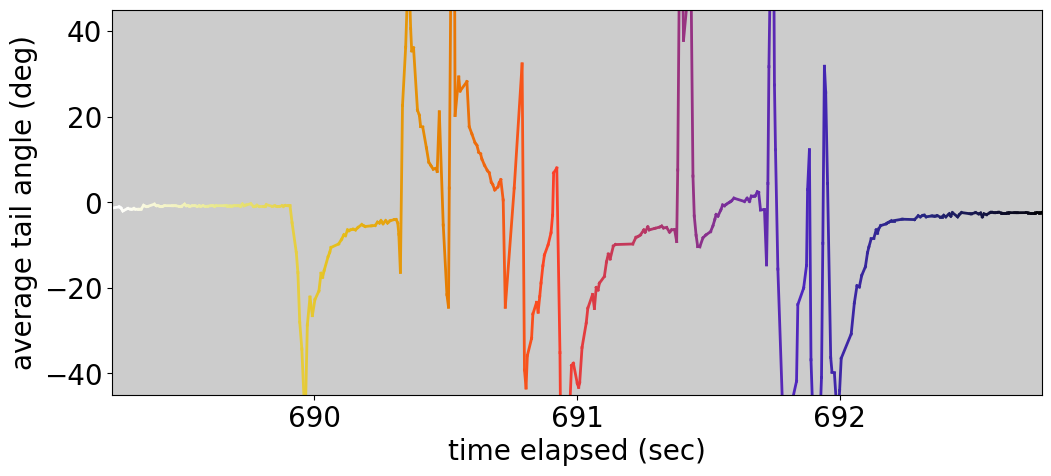

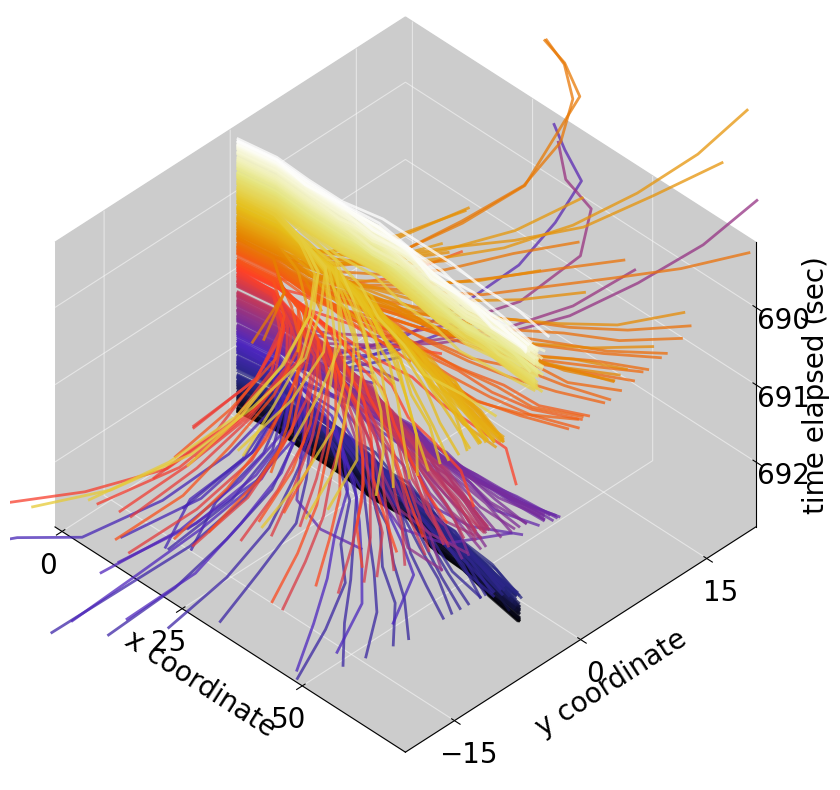

In [2]:

os.chdir(out_dir)

stim = t_stamps[1::2]
time = t_stamps[::2]
x_coords = data[::2, :]
x_coords = x_coords - np.nanmean(x_coords[:,0], axis=0)
y_coords = data[1::2, :] 
y_coords = y_coords - np.nanmean(y_coords[:,0], axis=0)

n_frames = len(x_coords)

angles = np.arctan2(np.diff(y_coords, axis=1), np.diff(x_coords, axis=1))
angles = np.unwrap(angles)

orients = np.nanmean(angles, axis=1)
diff_angles = np.diff(angles, axis=1)

bend_amps = np.nanmean(diff_angles, axis=1)
bend_amps[np.isnan(bend_amps)] = 0
bend_amps_filt = savgol_filter(bend_amps, 11, 5)

cmap = cm.get_cmap('CMRmap_r')

bracket = 350
n_frames_plot = bracket
y_lim_bend = 45
n_xtick =4

elevation = 40

def make_track_plots(frame):
    st = frame
    end = frame + bracket
    #x = np.arange(st, end)
    x = time[st:end]

    for i in range(len(x)-1):
        plt.plot(x[i:i+2],np.rad2deg(orients[st+i:st+i+2]), color = cmap(i/n_frames_plot) )

    plt.xlabel('time elapsed (sec)')
    plt.ylabel('average tail angle (deg)')
    plt.ylim([-y_lim_bend,y_lim_bend])
    plt.xlim([x[0], x[-1]])
    plt.gca().set_facecolor((0.8,0.8,0.8))
    # plt.vlines(x[int(len(x)/2)], -30, 30, 'r', linestyles='dashed')
    # plt.vlines(x[n_frames_plot], -30, 30, 'r', linestyles='dashed')

    plt.gca().xaxis.set_major_locator(plt.MaxNLocator(n_xtick))
    plt.savefig("tail_angle_frame_" + str(st) + '.svg')
    plt.show()

    fig = plt.figure(figsize = (15,10))
    ax = fig.add_subplot(projection='3d')
    for k, tp in reversed(list(enumerate(range(frame, frame+n_frames_plot)))):
        ax.plot(x_coords[tp,:-1], y_coords[tp,:-1], time[tp], color = cmap(k/n_frames_plot), alpha=0.75)
    ax.set_proj_type('ortho')
    ax.view_init(elev=elevation, azim=-45)
    ax.set_ylim([-20,20])
    ax.set_xlim([0,70])
    ax.invert_zaxis()
    # make the panes transparent
    ax.xaxis.set_pane_color((0.8, 0.8, 0.8, 1))
    ax.yaxis.set_pane_color((0.8, 0.8, 0.8, 1))
    ax.zaxis.set_pane_color((0.8, 0.8, 0.8, 1))
    # make the grid lines transparent
    ax.xaxis._axinfo["grid"]['color'] =  (1,1,1,0.5)
    ax.yaxis._axinfo["grid"]['color'] =  (1,1,1,0.5)
    ax.zaxis._axinfo["grid"]['color'] =  (1,1,1,0.5)
    ax.xaxis.set_major_locator(plt.MaxNLocator(3))
    ax.yaxis.set_major_locator(plt.MaxNLocator(3))
    ax.zaxis.set_major_locator(plt.MaxNLocator(4))
    ax.set_xlabel('x coordinate')
    ax.set_ylabel('y coordinate')
    ax.set_zlabel('time elapsed (sec)')
    plt.savefig("tail_track_3d_" + str(st) + '.svg')
    plt.show()

# plot some example stretches
with plt.rc_context({'lines.linewidth': 2, 'figure.figsize': (12,5), 'font.size':20}):

    make_track_plots(33140)
    make_track_plots(54415)
    make_track_plots(71420)

Plot the timestamps vs the GPIO input value recorded

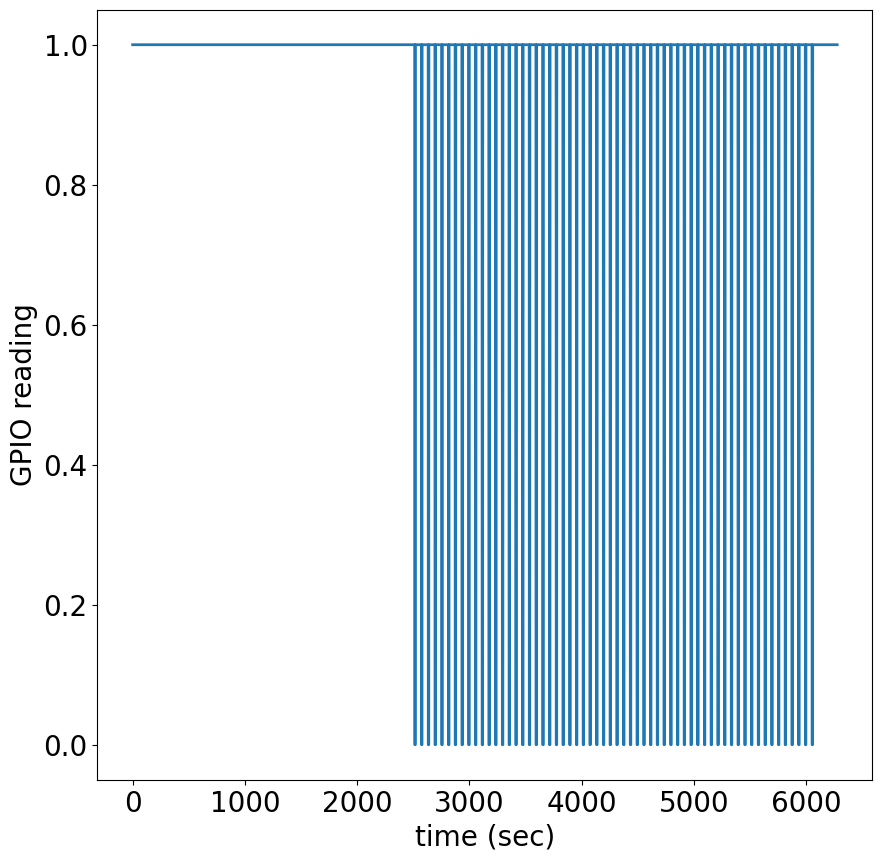

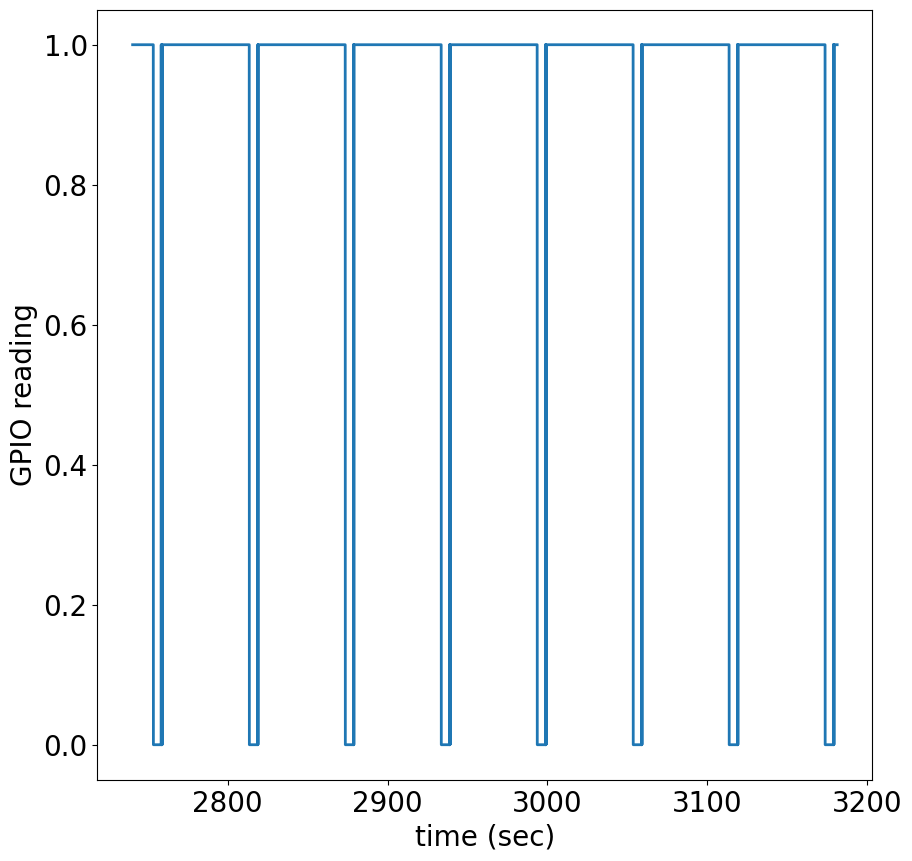

In [3]:
x_ranges = [np.arange(len(stim)), np.arange(300000,350000)]
for x_range in x_ranges:
    with plt.rc_context({'lines.linewidth': 2, 'figure.figsize': (12,5), 'font.size':20}):
        plt.figure(figsize=(10,10))
        plt.plot(time[x_range], stim[x_range])
        plt.xlabel('time (sec)')
        plt.ylabel('GPIO reading')

plot the distibution of inter-frame intervals

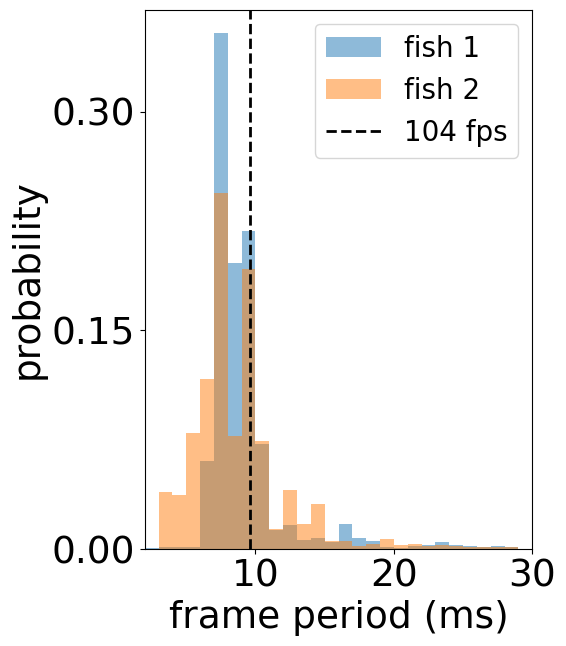

In [61]:
os.chdir(out_dir)
tstamp_files = glob.glob(dir_path+'\*\*_tstamps.txt')
with plt.rc_context({'lines.linewidth': 2, 'figure.figsize': (5,7), 'font.size':27}):
    
    for tstamp_file in tstamp_files:
        t_stamps = np.loadtxt(tstamp_file, delimiter=',')
        time = t_stamps[::2] 
        d_time = np.diff(time) * 1000 # inter-frame intervals in msec
        plt.hist(d_time, np.arange(0,30,1), density=True, histtype='stepfilled', alpha=0.5)
        plt.xlabel('frame period (ms)')
        plt.xticks([0, 10, 20, 30])
        plt.yticks([0, 0.15, 0.3])
        plt.ylabel('probability')

    plt.vlines(1000/104, ymin=0, ymax=0.37, colors='k', linestyles='dashed')
    plt.ylim((0,0.37))
    plt.xlim((2,30))
    plt.legend(['fish 1', 'fish 2', '104 fps'], fontsize=20)
    plt.savefig('histogram_interframe.svg', bbox_inches='tight')


analyse the frequency and disrubition of NaN values in the tracking data, and relate that to swimming events to see if tracking points are missing preferentially during swimming

c:\Users\owen.randlett\Documents\pi_tailtrack\20220822\20220822--101017_coords.txt


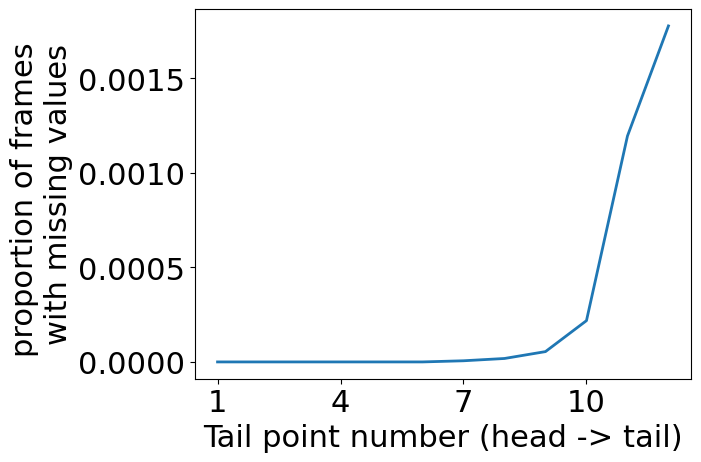

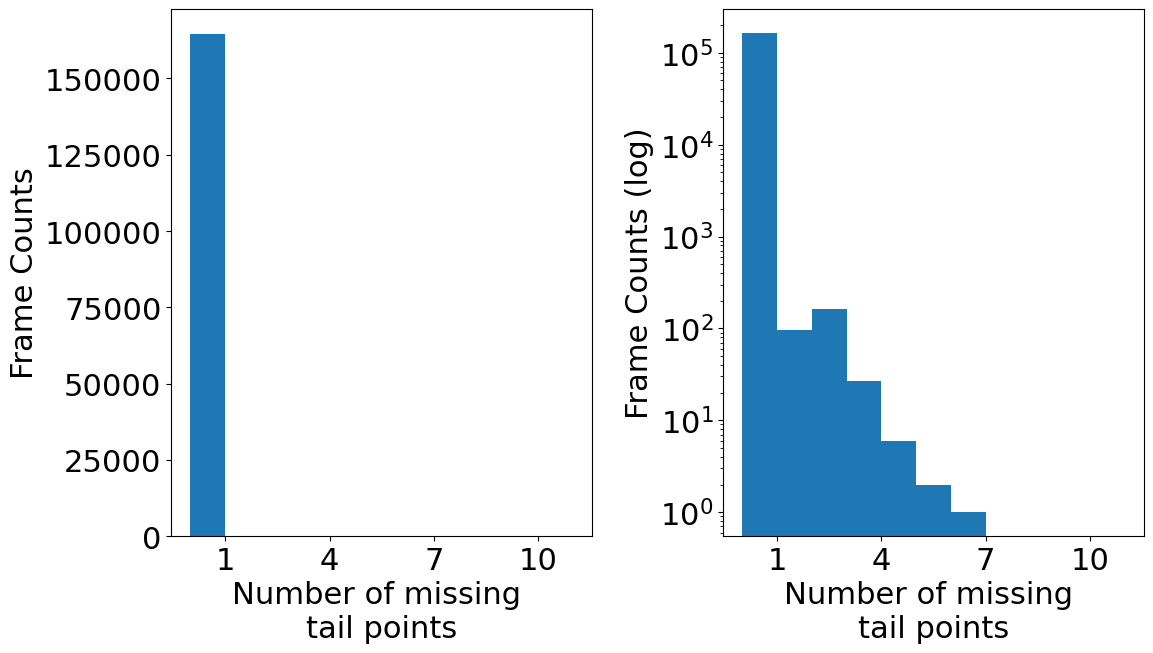

-0.07107027246490742
1.5998506860327563e-183


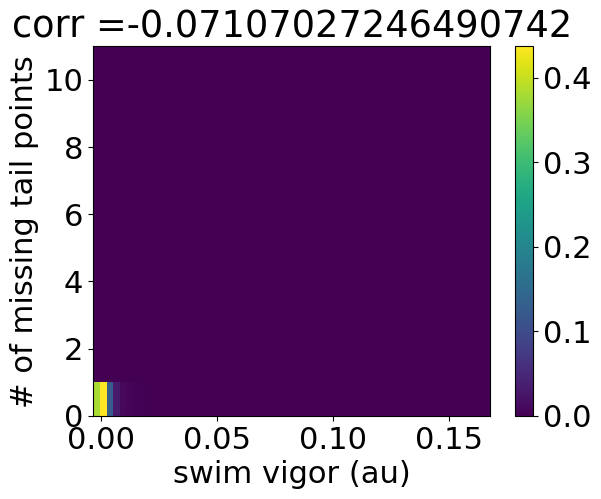

c:\Users\owen.randlett\Documents\pi_tailtrack\20221213\20221213--093215_coords.txt


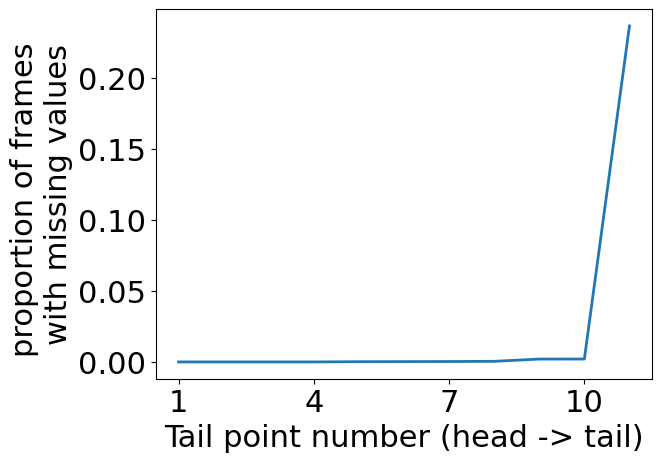

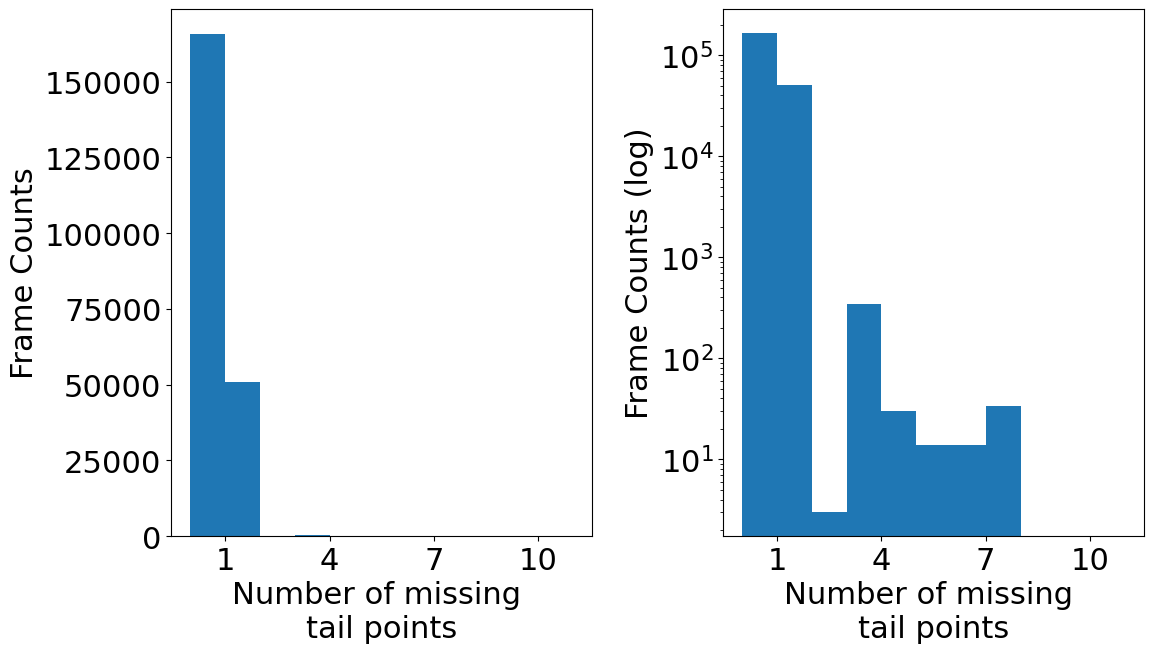

-0.01388420490219139
9.872953510166624e-11


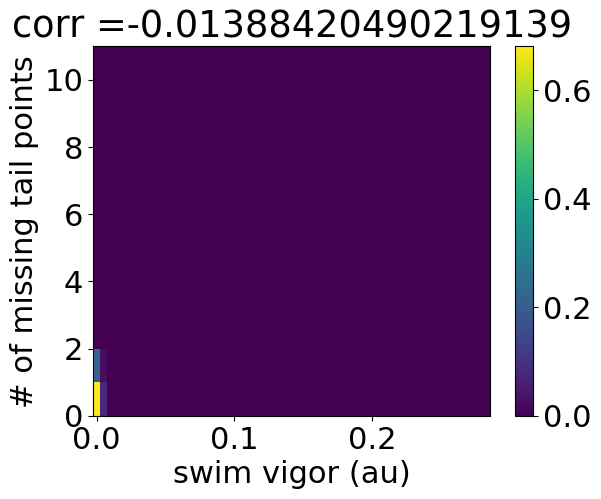

In [216]:
import seaborn as sns
from matplotlib.colors import LogNorm
from scipy.stats import pearsonr, spearmanr

os.chdir(out_dir)

data_files = glob.glob(dir_path+'\*\*_coords.txt')
with plt.rc_context({'lines.linewidth': 2, 'font.size':22}):
    for file_id in range(len(data_files)):
        print(data_files[file_id])

        data = np.loadtxt(data_files[file_id], delimiter=',')

        x_coords = data[1000000::2, :12]
        x_coords = x_coords - np.nanmean(x_coords[:,0], axis=0)
        y_coords = data[1000001::2, :12] 
        y_coords = y_coords - np.nanmean(y_coords[:,0], axis=0)

        n_frames = len(x_coords)

        angles = np.arctan2(np.diff(y_coords, axis=1), np.diff(x_coords, axis=1))
        angles = np.unwrap(angles)

        orients = np.nanmean(angles, axis=1)
        diff_angles = np.diff(angles, axis=1)

        bend_amps = np.nanmean(diff_angles, axis=1)
        bend_amps[np.isnan(bend_amps)] = 0
        bend_amps_filt = savgol_filter(bend_amps, 11, 5)


        NaN_points = np.isnan(x_coords).astype(int)

        NaN_per_point = np.mean(NaN_points, axis=0)
        plt.plot(np.arange(len(NaN_per_point))+1,NaN_per_point)
        plt.xlabel('Tail point number (head -> tail)')
        plt.ylabel('proportion of frames \nwith missing values')
        plt.xticks(np.arange(1,12,3))
        plt.show()

        segs_per_frame = np.sum(1-NaN_points, axis=1)
        misses_per_frame = np.sum(NaN_points, axis=1)
        
        fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

        ax[0].hist(misses_per_frame, np.arange(12), density=False, cumulative=False)
        ax[0].set_ylabel('Frame Counts')
        ax[0].set_xlabel('Number of missing \ntail points')
        ax[0].set_xticks(np.arange(1,12,3))


        ax[1].hist(misses_per_frame, np.arange(12), density=False, cumulative=False)
        ax[1].set_ylabel('Frame Counts (log)')
        ax[1].set_xlabel('Number of missing \ntail points')
        ax[1].set_xticks(np.arange(1,12,3))
        plt.yscale('log')
        plt.tight_layout()
        plt.show()
        

        def rolling_window(a, window):
            pad = np.ones(len(a.shape), dtype=np.int32)
            pad[-1] = window-1
            pad = list(zip(pad, np.zeros(len(a.shape), dtype=np.int32)))
            a = np.pad(a, pad,mode='reflect')
            shape = a.shape[:-1] + (a.shape[-1] - window + 1, window)
            strides = a.strides + (a.strides[-1],)
            return np.lib.stride_tricks.as_strided(a, shape=shape, strides=strides)


        tail_power = np.std(rolling_window(bend_amps_filt, 5), -1)
        tail_power = tail_power - np.median(tail_power)

        stat, p = spearmanr(tail_power, segs_per_frame)
        print(stat)
        print(p)
        sns.histplot(x=tail_power, y = misses_per_frame, bins=(60, np.arange(12)), stat='probability',
                    cbar=True, thresh=None, cmap='viridis')

        plt.ylabel('# of missing tail points')
        plt.xlabel('swim vigor (au)')
        plt.title('corr =' + str(stat))
        plt.show()

